<b>Given:</b><br><br>
A small dataset with flat sizes (x) and flat prices (y)<br>
Two data points for simplicity - a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

<b>Find:</b><br><br>
Linear regression function by minimizing squared error

<b>Solution:</b>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set()

Set train data

In [44]:
x_train = np.array([1,2])
y_train = np.array([300,500])

Define Loss Function $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

In [45]:
def CalculateLoss(x,y,w,b):
    
    f_wb = y - (w*x + b)
    m = np.shape(x)[0]

    cost = np.sum(f_wb**2) / (2*m)
    
    return cost

Compute Gradient  -  $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$

In [46]:
def ComputeGradient(x,y,w,b):
    dJ_dw = np.sum(((w*x + b) - y)*x)
    dJ_db = np.sum(((w*x + b) - y))
    return dJ_dw, dJ_db

Gradient Descent Process<br><br>
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [47]:
def GD(w_init,b_init,x,y):

    w = w_init
    b = b_init

    alpha = 0.01 # learning rate
    iterations = 10000

    log = np.array([w_init,b_init,CalculateLoss(x,y,w,b)])

    i = 0
    while i < iterations:

        dJ_dw, dJ_db = ComputeGradient(x,y,w,b)
        w = w - alpha*dJ_dw
        b = b - alpha*dJ_db

        i = i+1
        log = np.vstack((log,[w,b,CalculateLoss(x,y,w,b)]))
        #print(w, b, CalculateLoss(x,y,w,b))
        
    return w, b, log


Generate random w & b points

In [48]:
w_rand = np.random.uniform(low=-10, high=10)
b_rand = np.random.uniform(low=-10, high=10)

Run GD

In [49]:
w, b, log = GD(w_rand,b_rand,x_train,y_train)

18.312945334020675 12.818812228192915 68822.55188496172
30.012733700473852 20.013047623608436 59713.68971635387
40.91170558674191 26.712404660122054 51810.69040590555
51.06474816760115 32.95080539931735 44953.91682079347
60.52298659724158 38.75984684630297 39004.86525714347
69.33404186199041 44.168960311459664 33843.367708623315
77.5422709595471 49.20555984937076 29365.16451038004
85.18899061608862 53.89518052359693 25479.798326489876
92.31268566957628 58.26160719464233 22108.78694012739
98.9492031702582 62.326994480662194 19184.037937387744
105.13193317732542 66.1119784959412 16646.473261872015
110.89197716358092 69.63578093070261 14444.83585646935
116.2583048774808 72.91630599718113 12534.654286873849
121.25790045369132 75.97023073091307 10877.34443255567
125.91589850907937 78.81308910268407 9439.430099625457
130.25571091054488 81.459350365358 8191.866812216291
134.2991448540569 83.9224920307345 7109.455123180833
138.06651285043202 86.21506784449811 6170.331593163688
141.576735172575

w,b,Err2(w,b) surface to visualize the descend

In [50]:
err2 = []

for w_ in range (0, 300):
    for b_ in range (0, 200):
        error = CalculateLoss(x_train, y_train, w_, b_)
        err2.append([w_,b_,error])

err2 = np.array(err2)

Visualize surface and path

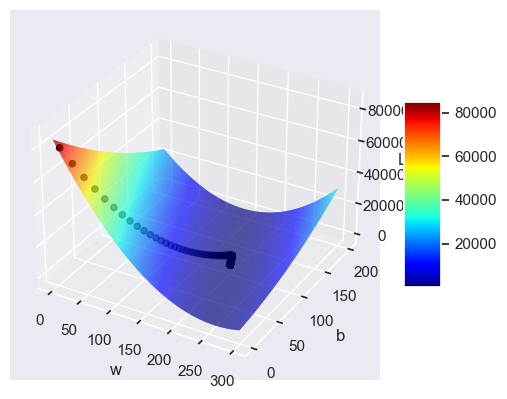

In [51]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Loss")

from matplotlib import cm
w_b_surface = ax.plot_trisurf(err2[:,0], err2[:,1], err2[:,2], cmap=cm.jet, linewidth=0)
fig.colorbar(w_b_surface, shrink=0.5, aspect=5)

ax.scatter(log[:,0],log[:,1],log[:,2], c='black')